## Groupby

In [2]:
import pandas as pd
import numpy as np

In [51]:
df= pd.DataFrame({'Name':['Ram','Sam','Hari','Lucky','Sita'],
                 'Group':[1,2,1,3,2],'Score': [20,40,35,11,54], 'Gender':[1,1,1,1,0]})
df

,Name,Group,Score,Gender
0,Ram,1,20,1
1,Sam,2,40,1
2,Hari,1,35,1
3,Lucky,3,11,1
4,Sita,2,54,0


In [20]:
df.groupby('Group')

In [21]:
df.groupby('Group').mean()

,Score,Gender
Group,,
1,27.5,1.0
2,47.0,0.5
3,11.0,1.0


In [22]:
df.groupby('Gender').mean()

,Group,Score
Gender,,
0,2.00,54.0
1,1.75,26.5


In [23]:
a=df.groupby('Group').mean()

In [24]:
a

,Score,Gender
Group,,
1,27.5,1.0
2,47.0,0.5
3,11.0,1.0


In [26]:
a['Score']

Group
1    27.5
2    47.0
3    11.0
Name: Score, dtype: float64

In [29]:
a[['Score']]

,Score
Group,
1,27.5
2,47.0
3,11.0


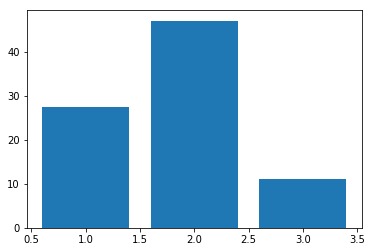

In [31]:
import matplotlib.pyplot as plt
plt.bar([1,2,3], df.groupby('Group').mean()['Score'])
plt.show()

In [33]:
df.groupby('Group').agg('mean')

,Score,Gender
Group,,
1,27.5,1.0
2,47.0,0.5
3,11.0,1.0


In [34]:
df.groupby('Group').std()

,Score,Gender
Group,,
1,10.606602,0.000000
2,9.899495,0.707107
3,NaN,NaN


In [38]:
df.groupby('Group').count()['Score']

Group
1    2
2    2
3    1
Name: Score, dtype: int64

In [39]:
df.Gender.value_counts()

1    4
0    1
Name: Gender, dtype: int64

In [52]:
df

,Name,Group,Score,Gender
0,Ram,1,20,1
1,Sam,2,40,1
2,Hari,1,35,1
3,Lucky,3,11,1
4,Sita,2,54,0


In [42]:
for index, row in df.iterrows():
    print(index, row['Name'])

0 Ram
1 Sam
2 Hari
3 Lucky
4 Sita


In [43]:
df= pd.DataFrame({'Name':['Ram','Sam','Hari','Lucky','Sita'],
                 'Group':[1,2,1,3,2],'Score': [20,40,35,11,54], 'Class':['A','A','A','B','B']})
df

,Name,Group,Score,Class
0,Ram,1,20,A
1,Sam,2,40,A
2,Hari,1,35,A
3,Lucky,3,11,B
4,Sita,2,54,B


In [44]:
g1= df.groupby(['Class','Group']).count()
g1

Name  Score
Class Group             
A     1         2      2
      2         1      1
B     2         1      1
      3         1      1

In [47]:
df.groupby(['Class','Group']).agg('mean')

Score
Class Group       
A     1       27.5
      2       40.0
B     2       54.0
      3       11.0

In [48]:
g1

Name  Score
Class Group             
A     1         2      2
      2         1      1
B     2         1      1
      3         1      1

In [49]:
g1.index

MultiIndex(levels=[['A', 'B'], [1, 2, 3]],
           labels=[[0, 0, 1, 1], [0, 1, 1, 2]],
           names=['Class', 'Group'])

In [50]:
g1.loc[('B',2),'Name']

1

## fillna()

In [53]:
df= pd.DataFrame({'a':[1,np.nan,3,10],'b':[np.nan,np.nan,6,11],'c':[7,8,np.nan,12]})
df

,a,b,c
0,1.0,NaN,7.0
1,NaN,NaN,8.0
2,3.0,6.0,NaN
3,10.0,11.0,12.0


In [54]:
df.fillna(0)

,a,b,c
0,1.0,0.0,7.0
1,0.0,0.0,8.0
2,3.0,6.0,0.0
3,10.0,11.0,12.0


In [55]:
df.fillna('.?')

,a,b,c
0,1,.?,7
1,.?,.?,8
2,3,6,.?
3,10,11,12


In [56]:
df.fillna(df.mean())

,a,b,c
0,1.000000,8.5,7.0
1,4.666667,8.5,8.0
2,3.000000,6.0,9.0
3,10.000000,11.0,12.0


In [57]:
df['a'].fillna(df['a'].mean())

0     1.000000
1     4.666667
2     3.000000
3    10.000000
Name: a, dtype: float64

In [58]:
df['a'].fillna(method='ffill')
#bfill/ backfill, ffill/pad

0     1.0
1     1.0
2     3.0
3    10.0
Name: a, dtype: float64

In [59]:
df['a'].fillna(method='bfill')

0     1.0
1     3.0
2     3.0
3    10.0
Name: a, dtype: float64

In [60]:
# 10,  1 , 1  , 1

In [70]:
# example
df2= pd.DataFrame({'temp':['low','low','medium','medium','high','high',np.nan]})
df2

,temp
0,low
1,low
2,medium
3,medium
4,high
5,high
6,NaN


In [71]:
df2['temp'].fillna(method='ffill')

0       low
1       low
2    medium
3    medium
4      high
5      high
6      high
Name: temp, dtype: object

In [72]:
df2['temp']

0       low
1       low
2    medium
3    medium
4      high
5      high
6       NaN
Name: temp, dtype: object